In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/79478769/computing-a-confidence-interval-for-a-gaussian-weighted-integral

In [2]:
def integrand(x):
    return np.exp(-x ** 2) * np.abs(np.sin(x))

In [3]:
result, error = integrate.quad(integrand, -np.inf, np.inf)
result, error

(0.8488772760723557, 1.3100805773547108e-08)

In [4]:
def monte_carlo(size=30_000, limit=10):
    x = np.random.uniform(low=-limit, high=limit, size=size)
    y = integrand(x) * (2 * limit)
    return np.mean(y)

In [5]:
repeat = 3_000
results = []
for size in np.logspace(1, 4, 20):
    size = int(size)
    trials = [monte_carlo(size=size) for i in range(repeat)]
    results.append({
        "size": size,
        "mean": np.mean(trials),
        "std": np.std(trials),
    })

In [6]:
results = pd.DataFrame(results)

In [7]:
results

,size,mean,std
0,10,0.808249,0.621048
1,14,0.838079,0.547539
2,20,0.840960,0.467365
3,29,0.855568,0.380435
4,42,0.859170,0.321017
5,61,0.847425,0.264473
6,88,0.850424,0.218446
7,127,0.848946,0.183172
8,183,0.849580,0.151231
9,263,0.851069,0.127037


In [14]:
z = stats.norm().ppf(0.98)  # 2.0537489106318225
def ci(x):
    return pd.Series({
        "low": x["mean"] - z * x["std"],
        "high": x["mean"] + z * x["std"]
    })

In [15]:
results.loc[:, ["low", "high"]] = results.apply(ci, axis=1)

In [16]:
results

,size,mean,std,low,high
0,10,0.808249,0.621048,-0.467227,2.083725
1,14,0.838079,0.547539,-0.286429,1.962587
2,20,0.840960,0.467365,-0.118890,1.800810
3,29,0.855568,0.380435,0.074250,1.636886
4,42,0.859170,0.321017,0.199883,1.518458
5,61,0.847425,0.264473,0.304264,1.390587
6,88,0.850424,0.218446,0.401790,1.299058
7,127,0.848946,0.183172,0.472757,1.225136
8,183,0.849580,0.151231,0.538990,1.160170
9,263,0.851069,0.127037,0.590167,1.111971


(0.6, 1.1)

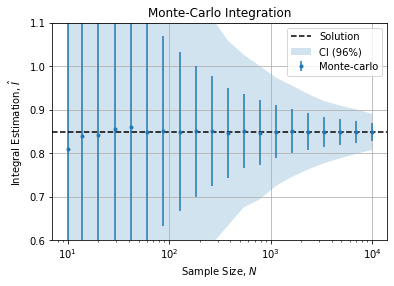

In [26]:
fig, axe = plt.subplots()
axe.errorbar(results["size"], results["mean"], yerr=results["std"], linestyle="none", marker=".", label="Monte-carlo")
axe.axhline(result, linestyle="--", color="black", label="Solution")
axe.fill_between(results["size"], results["low"], results["high"], alpha=0.2, label="CI (96%)")
axe.grid()
axe.set_xscale("log")
axe.set_xlabel("Sample Size, $N$")
axe.set_ylabel("Integral Estimation, $\hat{I}$")
axe.set_title("Monte-Carlo Integration")
axe.legend()
axe.set_ylim([0.6, 1.1])

In [12]:
xlin = np.linspace(-5, 5, 2000)
ylin = integrand(xlin)

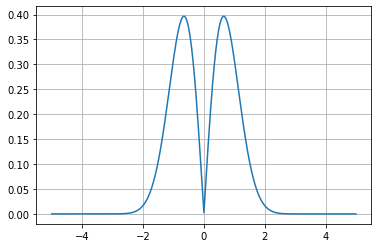

In [13]:
fig, axe = plt.subplots()
axe.plot(xlin, ylin)
axe.grid()